<a href="https://colab.research.google.com/github/jmacedo91/Exploratory-Data-Analysis/blob/main/001%20-%20CO%E2%82%82%20Emissions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CO₂ Emission in the World 🏭

## About Dataset

The impact of greenhouse gas emissions, particularly carbon dioxide (CO₂), on the earth's climate has become an increasingly important issue in recent years. CO₂ emissions are produced by a variety of human activities, including the burning of fossil fuels, deforestation, and industrial processes. Understanding how much CO₂ each country is emitting is crucial in developing effective climate policies and mitigating the effects of climate change.

The CO₂ emissions dataset provides a comprehensive overview of the amount of CO₂ emitted by each country. The dataset includes information on CO₂ emissions by country from 1960 to the present day. It covers all countries in the world and is compiled from various sources, including the United Nations Framework Convention on Climate Change (UNFCCC) and the International Energy Agency (IEA).

The dataset can be used by researchers, policymakers, and the general public to gain insight into the relative contributions of different countries to global CO₂ emissions. It can also be used to monitor changes in emissions over time and to assess the effectiveness of climate policies.

Overall, the CO₂ emissions dataset is an important resource for understanding the global climate challenge and for developing strategies to mitigate the impact of CO₂ emissions on our planet.

The dataset is available at https://www.kaggle.com/datasets/ulrikthygepedersen/co2-emissions-by-country

# 1. Importando as Bibliotecas

In [26]:
!pip install bar_chart_race

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8/156.8 KB 4.0 MB/s eta 0:00:00


In [1]:
# Data Analysis
import pandas as pd
import numpy as np

# Data Visualization
import seaborn as sns
sns.set_theme(style='whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('figure', figsize = (18, 7.5))

## 1.1 Conhecendo os dados

In [2]:
df = pd.read_csv('co2_emissions_kt_by_country.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13953 entries, 0 to 13952
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_code  13953 non-null  object 
 1   country_name  13953 non-null  object 
 2   year          13953 non-null  int64  
 3   value         13953 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 436.2+ KB


In [4]:
df.head()

,country_code,country_name,year,value
0,ABW,Aruba,1960,11092.675
1,ABW,Aruba,1961,11576.719
2,ABW,Aruba,1962,12713.489
3,ABW,Aruba,1963,12178.107
4,ABW,Aruba,1964,11840.743


In [5]:
print(f"A série histórica contemplada nos dados abrange o período de {df['year'].min()} até {df['year'].max()}.")

A série histórica contemplada nos dados abrange o período de 1960 até 2019.


In [6]:
df['country_name'].unique()

array(['Aruba', 'Africa Eastern and Southern', 'Afghanistan',
       'Africa Western and Central', 'Angola', 'Albania', 'Andorra',
       'Arab World', 'United Arab Emirates', 'Argentina', 'Armenia',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bahamas, The', 'Bosnia and Herzegovina',
       'Belarus', 'Belize', 'Bermuda', 'Bolivia', 'Brazil', 'Barbados',
       'Brunei Darussalam', 'Bhutan', 'Botswana',
       'Central African Republic', 'Canada',
       'Central Europe and the Baltics', 'Switzerland', 'Chile', 'China',
       "Cote d'Ivoire", 'Cameroon', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica',
       'Caribbean small states', 'Cuba', 'Curacao', 'Cayman Islands',
       'Cyprus', 'Czechia', 'Germany', 'Djibouti', 'Dominica', 'Denmark',
       'Dominican Republic', 'Algeria',
       'East Asia & Pacific (excluding

Analisando os valores encontrados na coluna rotulada como nome dos países ("country_names"), encontramos também nomes de blocos econômicos e regiões geográficas que representam um conjunto de federações.

# 2. Analisando os Dados

## 2.1 Emissão de CO₂ pelos países do G20

### 2.1.1 Emissão Total de CO₂ durante toda a série histórica

Analisando os países contidos nos dados percebemos que a relação apresenta nomes de blocos econômicos e regiões geográficas que englobam diversas federações.

Inicialmente o foco do estudo se concentrará nos países do G20.

Criado em 1999, o G20 reúne as maiores economias do mundo, incluindo países desenvolvidos e economias emergentes. Funciona, essencialmente, como foro para o diálogo e a cooperação internacional sobre temas econômicos e de desenvolvimento. [1]

Os membros permanentes são África do Sul, Alemanha, Arábia Saudita, Argentina, Austrália, Brasil, Canadá, China, Coreia do Sul, Estados Unidos, França, Índia, Indonésia, Itália, Japão, México, Reino Unido, Rússia, Turquia e União Europeia. Esses países representam 80% do Produto Interno Bruto (PIB) global, 75% das exportações, cerca de 70% dos investimentos diretos estrangeiros e 60% da população mundial. [1]

Alemanha e Turquia são dois países que mudaram de nome durante sua história. Alemanha passou pelo processo de reunificação em 1990 [2] e a Turquia mudou a nomenclatura Turkey para Turkiye [3].

In [7]:
df = df.replace({'Turkey': 'Turkiye'}, regex=True)

In [8]:
df[df['country_name'] == 'Turkiye']

,country_code,country_name,year,value
12849,TUR,Turkiye,1960,16820.529000
12850,TUR,Turkiye,1961,17363.245000
12851,TUR,Turkiye,1962,21631.633000
12852,TUR,Turkiye,1963,22669.394000
12853,TUR,Turkiye,1964,26336.394000
12854,TUR,Turkiye,1965,27388.823000
12855,TUR,Turkiye,1966,31547.201000
12856,TUR,Turkiye,1967,33523.714000
12857,TUR,Turkiye,1968,36314.301000
12858,TUR,Turkiye,1969,38807.861000


In [9]:
G20_countries = ['Argentina', 'Australia', 'Brazil', 'Canada', 'China', 
       'France', 'Germany', 'India', 'Indonesia', 'Italy', 
       'Japan', 'Korea, Rep.', 'Mexico', 'Russian Federation', 'Saudi Arabia', 
       'South Africa', 'Turkiye', 'United Kingdom', 'United States', 'European Union']

In [10]:
G20 = pd.DataFrame()

In [11]:
for country in G20_countries:
    G20 = pd.concat([G20, df[df['country_name'] == country]])

In [12]:
G20['country_name'].unique()

array(['Argentina', 'Australia', 'Brazil', 'Canada', 'China', 'France',
       'Germany', 'India', 'Indonesia', 'Italy', 'Japan', 'Korea, Rep.',
       'Mexico', 'Russian Federation', 'Saudi Arabia', 'South Africa',
       'Turkiye', 'United Kingdom', 'United States', 'European Union'],
      dtype=object)

Os valores da série histórica foram agrupados para identificação dos principais emissores de CO₂ durante esse período.

In [13]:
rank_G20 = G20.groupby(by='country_name').sum()
rank_G20 = rank_G20.reset_index()
rank_G20 = rank_G20.sort_values(by='value', ascending=False)[['country_name', 'value']]
rank_G20.index = [x for x in range(len(rank_G20))]

In [14]:
rank_G20

,country_name,value
0,United States,2.840366e+08
1,China,2.159975e+08
2,European Union,1.945354e+08
3,Russian Federation,1.344118e+08
4,Japan,5.726082e+07
5,India,4.816875e+07
6,United Kingdom,3.278625e+07
7,Canada,2.609352e+07
8,Germany,2.436702e+07
9,France,2.296071e+07


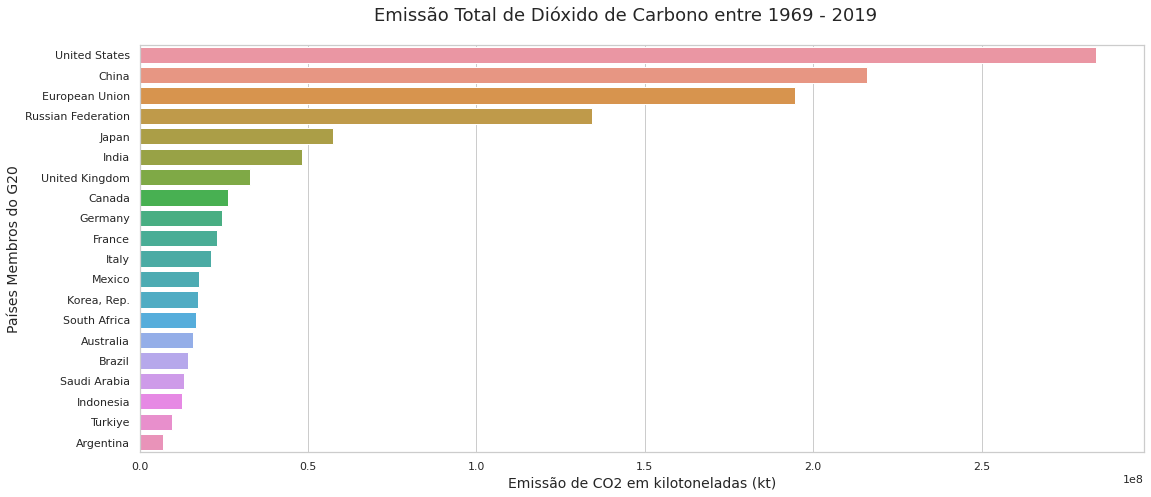

In [15]:
ax = sns.barplot(data=rank_G20, y='country_name', x='value', orient='h')
plt.suptitle('Emissão Total de Dióxido de Carbono entre 1969 - 2019', x = 0.5, y = 0.95, fontsize = 18)
plt.title('', x = 0.5, y = 1.0, fontsize = 14)
ax.set_xlabel('Emissão de CO2 em kilotoneladas (kt)', fontsize = 14)
ax.set_ylabel('Países Membros do G20', fontsize = 14)
ax = ax

Em uma primeira análise é possível notar que o volume total de dióxido de carbono emitido nos últimos 60 anos por Estados Unidos, China, União Européia e Rússia destoam dos demais países. Considerando apenas os membros do G20 vamos avaliar a fração desse consumo.

In [16]:
rank_G20['G20 proportion'] = round(rank_G20['value'] / rank_G20['value'].sum(), 3)
rank_G20['G20 percentage (%)'] = rank_G20['G20 proportion'] * 100

In [17]:
rank_G20

,country_name,value,G20 proportion,G20 percentage (%)
0,United States,2.840366e+08,0.240,24.0
1,China,2.159975e+08,0.182,18.2
2,European Union,1.945354e+08,0.164,16.4
3,Russian Federation,1.344118e+08,0.113,11.3
4,Japan,5.726082e+07,0.048,4.8
5,India,4.816875e+07,0.041,4.1
6,United Kingdom,3.278625e+07,0.028,2.8
7,Canada,2.609352e+07,0.022,2.2
8,Germany,2.436702e+07,0.021,2.1
9,France,2.296071e+07,0.019,1.9


A participação dos EUA na emissão de CO₂ é de aproximadamente 25% entre os membros do G20. A China aparece em segundo lugar com quase 20% na participação de emissão de CO₂ na atmosfera, vale lembrar que a partir de 1978 a China passou por diversas reformas políticas e econômicas que a aproximaram do restante do mundo. Entre 1978 até 2018, o PIB chinês cresceu de US\$ 150 bilhões para US\$ 12,2 trilhões, uma das maiores taxas no mundo. Ainda, em 2010, o país se tornou a segunda maior economia do globo permanecendo nesta posição desde então. [4]

In [18]:
total_world = df[df['country_name'] == "World"].groupby("country_name").sum()['value'][0]

In [19]:
rank_G20['World Percentage (%)'] = round(rank_G20['value'] / total_world, 3) * 100

In [20]:
rank_G20

,country_name,value,G20 proportion,G20 percentage (%),World Percentage (%)
0,United States,2.840366e+08,0.240,24.0,21.6
1,China,2.159975e+08,0.182,18.2,16.4
2,European Union,1.945354e+08,0.164,16.4,14.8
3,Russian Federation,1.344118e+08,0.113,11.3,10.2
4,Japan,5.726082e+07,0.048,4.8,4.3
5,India,4.816875e+07,0.041,4.1,3.7
6,United Kingdom,3.278625e+07,0.028,2.8,2.5
7,Canada,2.609352e+07,0.022,2.2,2.0
8,Germany,2.436702e+07,0.021,2.1,1.8
9,France,2.296071e+07,0.019,1.9,1.7


Quando os valores de emissão de total de CO₂ são comparados em proporção mundial percebe-se que a variação não apresentam grandes diferenças em relação à emissão total dos países que compõem o G20.

Essa diferença é pequena pois os países membros do G20 representam cerca de 90% da emissão total de CO₂ do mundo.

In [21]:
# Relação Emissão Total de CO₂ G20 / Emissão Total de CO₂ Mundial
round(rank_G20['value'].sum() / total_world, 3)

0.9

A produção de gases de efeito estufa tem aumentado entre todos os membros do G20, principalmente em nações como Argentina, China, Índia e Indonésia. O Relatório de Transparência Climática, apresentado nas vésperas da 26º Conferência do Clima (COP26), prevê que as emissões de CO₂ tendem a aumentar nos próximos anos. [5]

### 2.1.2 Evolução da série histórica da emissão de CO₂ durante o período de 1960 até 2019

Voltando aos dados que contemplam toda a série histórica da emissão de CO₂ dos países membros do G20, vamos avaliar como esse rank se alterou durante todo o período.

In [22]:
G20_pivot = G20.pivot(index='year', columns='country_name', values='value')

In [23]:
G20_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 1960 to 2019
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Argentina           60 non-null     float64
 1   Australia           60 non-null     float64
 2   Brazil              60 non-null     float64
 3   Canada              60 non-null     float64
 4   China               60 non-null     float64
 5   European Union      60 non-null     float64
 6   France              60 non-null     float64
 7   Germany             30 non-null     float64
 8   India               60 non-null     float64
 9   Indonesia           60 non-null     float64
 10  Italy               60 non-null     float64
 11  Japan               60 non-null     float64
 12  Korea, Rep.         60 non-null     float64
 13  Mexico              60 non-null     float64
 14  Russian Federation  60 non-null     float64
 15  Saudi Arabia        60 non-null     float64
 16  South

In [24]:
G20_pivot

country_name,Argentina,Australia,Brazil,Canada,China,European Union,France,Germany,India,Indonesia,Italy,Japan,"Korea, Rep.",Mexico,Russian Federation,Saudi Arabia,South Africa,Turkiye,United Kingdom,United States
year,,,,,,,,,,,,,,,,,,,,
1960,48815.104000,88202.351000,46908.264000,192895.201000,7.807263e+05,1.687911e+06,271218.654000,NaN,1.205820e+05,21404.279000,109357.274000,2.327812e+05,12552.141000,63116.404000,1.448637e+06,2676.910000,97934.569000,16820.529000,584299.780000,2.890696e+06
1961,51180.319000,90589.568000,49203.806000,194182.318000,5.520668e+05,1.775817e+06,281211.229000,NaN,1.304022e+05,26024.699000,124549.655000,2.831181e+05,14462.648000,65305.603000,1.493932e+06,3571.658000,102213.958000,17363.245000,588938.535000,2.880506e+06
1962,53695.881000,94912.961000,53695.881000,207185.500000,4.403590e+05,1.924617e+06,298706.486000,NaN,1.434677e+05,22995.757000,146456.313000,2.932207e+05,17278.904000,63809.467000,1.567951e+06,6255.902000,105767.281000,21631.633000,593360.937000,2.987208e+06
1963,50083.886000,101029.517000,55617.389000,211109.190000,4.366957e+05,2.102661e+06,334019.696000,NaN,1.540837e+05,22783.071000,164780.312000,3.252226e+05,21103.585000,66361.699000,1.681525e+06,6945.298000,109826.650000,22669.394000,603822.888000,3.119231e+06
1964,55727.399000,108979.573000,56735.824000,237801.283000,4.369230e+05,2.223324e+06,345303.055000,NaN,1.506477e+05,22394.369000,175957.328000,3.593183e+05,22218.353000,74278.752000,1.788304e+06,7047.974000,119657.877000,26336.394000,608355.300000,3.255995e+06
1965,58866.351000,120966.996000,56398.460000,252153.921000,4.759729e+05,2.308396e+06,351852.317000,NaN,1.659721e+05,24689.911000,189767.250000,3.869198e+05,25005.273000,75246.840000,1.897053e+06,4220.717000,128260.659000,27388.823000,622619.930000,3.390923e+06
1966,63138.406000,120332.605000,64304.512000,259319.239000,5.227895e+05,2.412861e+06,347235.564000,NaN,1.717659e+05,23395.460000,214248.142000,4.197432e+05,30014.395000,80930.690000,2.003392e+06,6413.583000,128356.001000,31547.201000,618564.228000,3.561878e+06
1967,65543.958000,129265.417000,66193.017000,281896.958000,4.332340e+05,2.530015e+06,372009.816000,NaN,1.722390e+05,24561.566000,234427.643000,4.898819e+05,35151.862000,90101.857000,2.094843e+06,25507.652000,133885.837000,33523.714000,592517.527000,3.695709e+06
1968,69082.613000,134622.904000,77421.371000,303539.592000,4.689286e+05,2.707669e+06,384631.630000,NaN,1.873360e+05,27586.841000,249495.346000,5.625655e+05,37242.052000,93988.877000,2.153699e+06,29104.979000,138084.552000,36314.301000,606969.174000,3.831355e+06


In [27]:
import bar_chart_race as bcr
bcr.bar_chart_race(df=G20_pivot, title="Emissão de CO₂ 1960 - 2019")

/usr/local/lib/python3.9/dist-packages/bar_chart_race/_make_chart.py:286: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(self.df_values.columns)
/usr/local/lib/python3.9/dist-packages/bar_chart_race/_make_chart.py:287: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([max_val] * len(ax.get_xticks()))


Exception: ignored

# Referências Bibliográficas

[1] TCU. Líderes de instituições superiores de controle do G20 apontam desafios do mundo pós-pandêmico. Portal TCU, Brasília, 18 mar. 2021. Disponível em: https://portal.tcu.gov.br/imprensa/noticias/lideres-de-instituicoes-superiores-de-controle-do-g20-apontam-desafios-do-mundo-pos-pandemico.htm. Acesso em: 23 mar. 2023.

[2] HISTÓRIA DO MUNDO. Reunificação da Alemanha. [S.l.], 2021. Disponível em: https://www.historiadomundo.com.br/idade-contemporanea/reunicacao-alemanha.htm#. Acesso em: 23 mar. 2023.

[3] EURONEWS. Turkey is now Türkiye. What other countries have changed their name? [S.l.], 2022. Disponível em: https://www.euronews.com/my-europe/2022/06/28/turkey-is-now-turkiye-what-other-countries-have-changed-their-name. Acesso em: 23 mar. 2023.

[4] POLITIZE. Ascensão pacífica chinesa. [S.l.], 2021. Disponível em: https://www.politize.com.br/ascensao-pacifica-chinesa/. Acesso em: 23 mar. 2023.

[5] CORREIO BRAZILIENSE. Emissões de CO2 voltam ao ritmo de pré-pandemia nos países do G20. [S.l.], 14 out. 2021. Disponível em: https://www.correiobraziliense.com.br/ciencia-e-saude/2021/10/4955494-emissoes-de-co2-voltam-ao-ritmo-de-pre-pandemia-nos-paises-do-g20.html. Acesso em: 23 mar. 2023.